C:\Users\HARISH\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Selected Lag Order (AIC): 15
  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 19, Apr, 2025
Time:                     14:04:00
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    13.6772
Nobs:                     984.000    HQIC:                   13.2521
Log likelihood:          -10442.4    FPE:                    438612.
AIC:                      12.9912    Det(Omega_mle):         382432.
--------------------------------------------------------------------
Results for equation Total Accidents
                         coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------------
const                       0.033879         0.471412            0.072           0.943
L1.Total Accidents         -0.901746         0.049459          -18.232           0.0

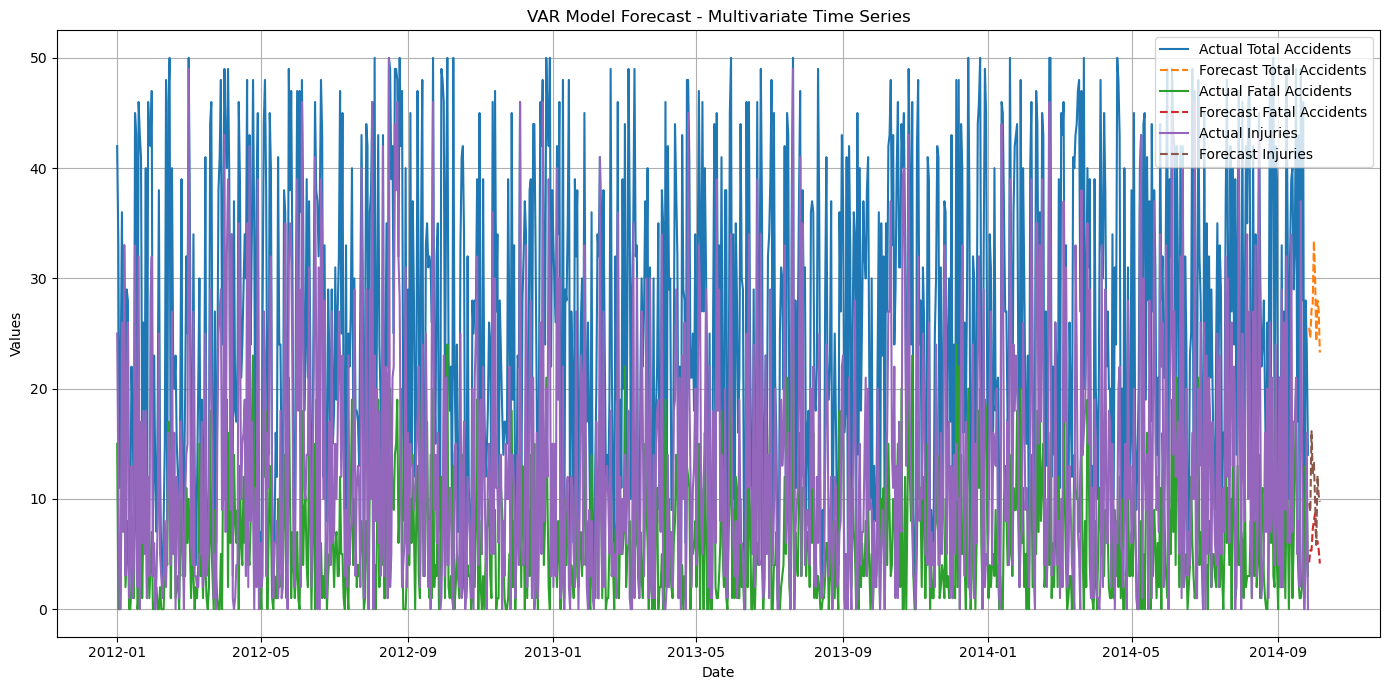

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller

# 1. Load the dataset
file_path = r"C:\Users\HARISH\Desktop\notes\time series and analysis pratical\ex 6\accident_time_series_1000_rows.csv"
df = pd.read_csv(file_path)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# 2. Select relevant columns
data = df[['Total Accidents', 'Fatal Accidents', 'Injuries']]

# 3. Check stationarity function
def check_stationarity(series):
    result = adfuller(series)
    return result[1] < 0.05  # Stationary if p-value < 0.05

# 4. Difference if needed
diff_data = data.copy()
for col in diff_data.columns:
    if not check_stationarity(diff_data[col]):
        print(f"{col} is not stationary. Differencing applied.")
diff_data = diff_data.diff().dropna()

# 5. Fit the VAR model
model = VAR(diff_data)
lag_order = model.select_order(maxlags=15).aic
print(f"Selected Lag Order (AIC): {lag_order}")
var_model = model.fit(lag_order)
print(var_model.summary())

# 6. Forecast
forecast_steps = 10
forecast = var_model.forecast(diff_data.values[-lag_order:], steps=forecast_steps)
forecast_df = pd.DataFrame(forecast, columns=data.columns)

# 7. Inverse transform to original scale
last_known = data.iloc[-1]
forecast_cumsum = forecast_df.cumsum()
forecast_final = forecast_cumsum + last_known.values
forecast_final = pd.DataFrame(forecast_final, columns=data.columns)

# 8. Create future date index for plotting
forecast_index = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=forecast_steps)
forecast_final.index = forecast_index

# 9. Plot actual vs forecast
plt.figure(figsize=(14, 7))
for col in data.columns:
    plt.plot(data.index, data[col], label=f'Actual {col}')
    plt.plot(forecast_final.index, forecast_final[col], linestyle='--', label=f'Forecast {col}')
    
plt.title("VAR Model Forecast - Multivariate Time Series")
plt.xlabel("Date")
plt.ylabel("Values")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
